In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Prepare the data

In [26]:
train_images = pd.read_csv('sign_mnist_train.csv')
train_images['label'].value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [27]:
train_images.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [28]:
train_label_numerical = train_images['label']
X_train = train_images.drop('label', axis=1)
train_label_numerical.value_counts()
TRUE_LABELS = {
    0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12:'m', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18:'s', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z'
        }

# check data

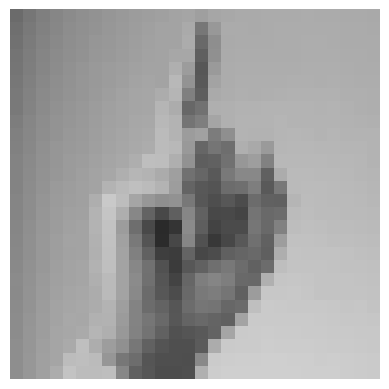

In [29]:
a = np.array(X_train.iloc[0],dtype=int)
a = a.reshape(28,28)
plt.imshow(a, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Convert data to tensorflow objects

In [30]:
IMG_SIZE=28

def process_img(image):
    """convert pixels from data frame rows to tf.tensor normalized to [0-1]"""
    img = np.array(image)
    img = img.reshape(28,28)
    img= tf.image.convert_image_dtype(img,tf.float32)  # convert_image_dtype scales values [0-1]
    return img

def tupled_img(X,y):
    """create tuple of image and label"""
    img=process_img(X)
    return (img,y)

In [31]:
x= tupled_img(X_train.iloc[0],train_label_numerical[0])
x

(<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
 array([[1.16009632e-17, 1.27935856e-17, 1.37693676e-17, 1.45283091e-17,
         1.50704102e-17, 1.55040911e-17, 1.58293517e-17, 1.62630326e-17,
         1.65882932e-17, 1.69135539e-17, 1.71303943e-17, 1.73472348e-17,
         1.76724954e-17, 1.78893358e-17, 1.72388145e-17, 1.79977561e-17,
         1.82145965e-17, 1.84314369e-17, 1.84314369e-17, 1.85398571e-17,
         1.85398571e-17, 1.85398571e-17, 1.86482774e-17, 1.85398571e-17,
         1.85398571e-17, 1.84314369e-17, 1.84314369e-17, 1.83230167e-17],
        [1.20346441e-17, 1.31188463e-17, 1.39862080e-17, 1.46367293e-17,
         1.52872506e-17, 1.56125113e-17, 1.60461922e-17, 1.63714528e-17,
         1.66967135e-17, 1.70219741e-17, 1.73472348e-17, 1.76724954e-17,
         1.77809156e-17, 1.84314369e-17, 1.29020059e-17, 1.64798730e-17,
         1.85398571e-17, 1.85398571e-17, 1.84314369e-17, 1.85398571e-17,
         1.86482774e-17, 1.86482774e-17, 1.86482774e-17, 1.86482774e-17,

## create batches

In [42]:
BATCH_SIZE =32
def create_batch(X,y=None,batch_size=BATCH_SIZE,test_data=False):
    """
    Create batches of data from images(X),labels(y)
    Shuffle training data (granted this data is already shuffled)
    Accepts test data as well   
    """
    if test_data:
        print("testbatch")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))   # convert to dataset
        data_batch = data.map(process_img).batch(batch_size)  # combine consecutive elements into batches
        return data_batch
    else: 
        print("trainbatch")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) 
        data = data.shuffle(buffer_size=len(data))
        data_batch = data.map(tupled_img).batch(batch_size)
        return data_batch    

In [43]:
create_batch(X_train,train_label_numerical)

trainbatch


NotImplementedError: in user code:

    File "C:\Users\Haroon\AppData\Local\Temp\ipykernel_17880\1529575431.py", line 12, in tupled_img  *
        img=process_img(X)
    File "C:\Users\Haroon\AppData\Local\Temp\ipykernel_17880\1529575431.py", line 5, in process_img  *
        img = np.array(image)

    NotImplementedError: Cannot convert a symbolic tf.Tensor (args_0:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.
